In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

### Plot for empirical conditional distribution at $x^*$

In [3]:
x1lb=0;
x1ub=10;
x2lb=-5;
x2ub=5;
x3lb=0;
x3ub=5;
# range of covariates

a0=5;
a1=1;
a2=2;
a3=0.5;
r0=1;
r1=0.1;
r2=0.2;
r3=0.05;
# coefficients of Test Problem 1

In [4]:
def normfun(x, mu, sigma): # pdf of the normal distribution 
    pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf
def g1fun(x0_1,x0_2,x0_3): # mean function of Scenario 1
    g1=a0+a1*x0_1+a2*x0_2+a3*x0_3
    return g1 
def g2fun(x0_1,x0_2,x0_3): # standard deviation function of Scenario 1
    g2=r0+r1*x0_1+r2*x0_2+r3*x0_3
    return g2 

In [5]:
# covariates of test data, x0=(1, 4,-1,3)
x0_1=4
x0_2=-1
x0_3=3
# data applied to plot underlying true conditional probability density function curves
xl=2
xr=16
X_pdf = np.arange(xl,xr,0.01)
Y_pdf = normfun(X_pdf, g1fun(x0_1,x0_2,x0_3),g2fun(x0_1,x0_2,x0_3))  

In [6]:
runi = 2
test_data_QRGMM_run0 = pd.read_csv(
    f"./data/ctestdata_QRGMM/ctestdata_QRGMM_{runi+1}.csv"
)
test_data_CWGAN_run0 = pd.read_csv(
    f"./data/ctestdata_CWGAN/ctestdata_CWGAN_{runi+1}.csv"
)
test_data_Diff_run0 = pd.read_csv(
    f"./data/ctestdata_Diffusion/ctestdata_Diffusion_{runi+1}.csv"
)
test_data_Rect_run0 = pd.read_csv(
    f"./data/ctestdata_RectFlow/ctestdata_RectFlow_{runi+1}.csv"
)

runi = 5
test_data_QRGMM_run1 = pd.read_csv(
    f"./data/ctestdata_QRGMM/ctestdata_QRGMM_{runi+1}.csv"
)
test_data_CWGAN_run1 = pd.read_csv(
    f"./data/ctestdata_CWGAN/ctestdata_CWGAN_{runi+1}.csv"
)
test_data_Diff_run1 = pd.read_csv(
    f"./data/ctestdata_Diffusion/ctestdata_Diffusion_{runi+1}.csv"
)
test_data_Rect_run1 = pd.read_csv(
    f"./data/ctestdata_RectFlow/ctestdata_RectFlow_{runi+1}.csv"
)

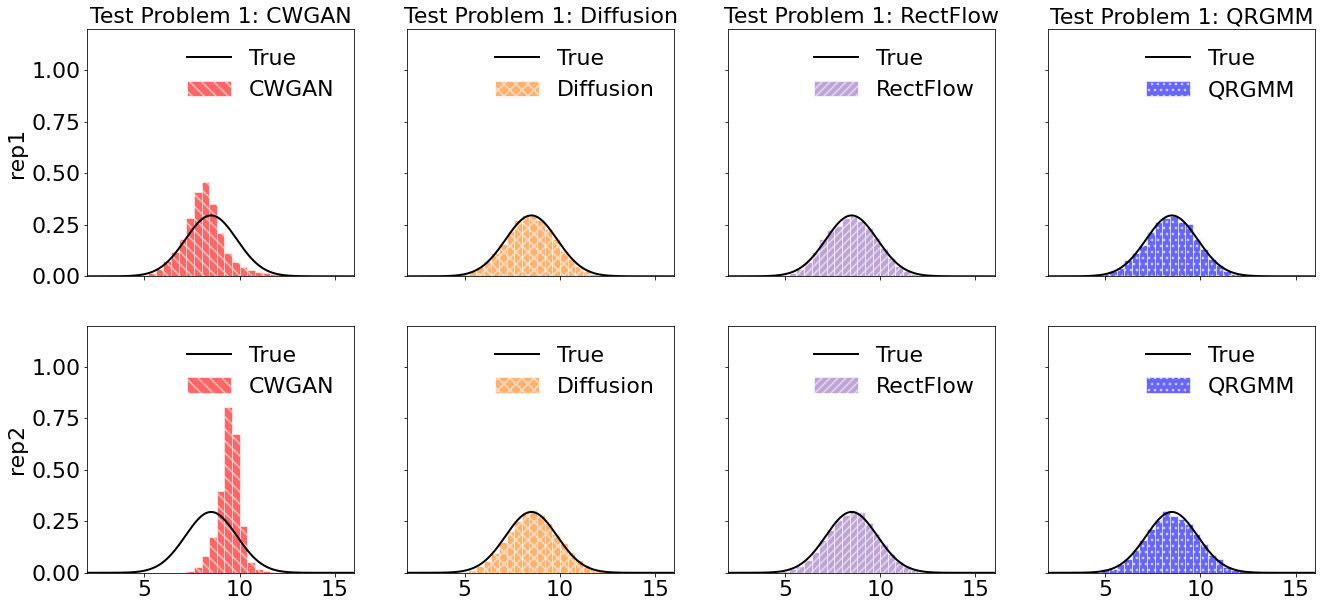

In [7]:
plt.rcParams['hatch.linewidth'] = 1.5

# 2 rows (rep1, rep2) x 4 cols (models)
fig, ax = plt.subplots(2, 4, figsize=(22, 10), sharex=True, sharey=True)
bins = np.arange(xl, xr, 0.4)

# ---- model style config (keep your current scheme) ----
models = [
    ("CWGAN",     "red",        "\\\\"),
    ("Diffusion", "tab:orange", "xx"),
    ("RectFlow",  "tab:purple", "///"),
    ("QRGMM",     "blue",       ".."),
]

# ---- data mapping for each rep ----
rep_data = [
    {  # rep1
        "CWGAN": test_data_CWGAN_run0["F"],
        "Diffusion": test_data_Diff_run0["F"],
        "RectFlow": test_data_Rect_run0["F"],
        "QRGMM": test_data_QRGMM_run0,
    },
    {  # rep2
        "CWGAN": test_data_CWGAN_run1["F"],
        "Diffusion": test_data_Diff_run1["F"],
        "RectFlow": test_data_Rect_run1["F"],
        "QRGMM": test_data_QRGMM_run1,
    }
]

row_names = ["rep1", "rep2"]

for r in range(2):
    for c, (name, color, hatch) in enumerate(models):
        a = ax[r, c]

        # True curve
        a.plot(X_pdf, Y_pdf, color='black', linewidth=2, label='True', zorder=5)

        # One model hist 
        a.hist(rep_data[r][name],
               bins=bins, density=True,
               color=color, alpha=0.6,
               label=name, edgecolor='w',
               hatch=hatch, zorder=3)

        a.set_xlim(xl, xr)
        a.set_ylim(0, 1.2)
        a.tick_params(labelsize=22)

        # Column titles (model names) on top row only
        if r == 0:
            a.set_title("Test Problem 1: " + name, fontsize=22)

        # Row labels on the leftmost column only
        if c == 0:
            a.set_ylabel(row_names[r], fontsize=22)

        a.legend(fontsize=22, frameon=False, loc="upper right")


# ---------- save ----------
os.makedirs("./plot", exist_ok=True)
fig.savefig('./plot/testproblem1_x0_plot.pdf',
            bbox_inches="tight", dpi=300)
plt.show()